In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [7]:
customer = pd.read_csv('/content/Customer-Churn.csv')
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
customer.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
customer.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [11]:
customer['TotalCharges'].replace(r'^\s*$', np.nan, regex=True, inplace=True)
customer['TotalCharges'] = customer['TotalCharges'].astype(float)
customer.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
customer.dropna(inplace=True)
customer.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Part -A**

In [13]:
print(sum(customer['gender']=='Male'))

3549


In [14]:
print(sum(customer['InternetService']=='DSL'))

2416


In [15]:
new_customer = customer[(customer['gender']=='Female') & (customer['SeniorCitizen']==1) & (customer['PaymentMethod']=='Mailed check')]
new_customer.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.70,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.40,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.60,No


In [16]:
new_customer1 = customer[(customer['tenure']<10) | (customer['TotalCharges']<500)]
new_customer1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


In [17]:
customer.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


**Part- B**

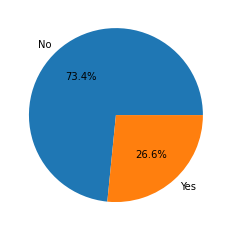

In [18]:
plt.pie(customer['Churn'].value_counts().tolist(),labels=customer['Churn'].value_counts().keys().tolist(),autopct="%0.1f%%")
plt.show()

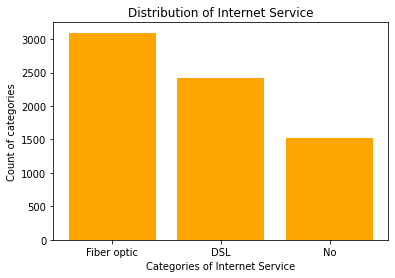

In [19]:
plt.bar(customer['InternetService'].value_counts().keys().tolist(),customer['InternetService'].value_counts().tolist(),color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of categories')
plt.title('Distribution of Internet Service')
plt.show()

**Part- C**

In [39]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

In [47]:
customer['Churn']=LabelEncoder().fit_transform(customer['Churn'])

In [49]:
X=customer[['tenure']]
Y=customer[['Churn']]
rs=3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=rs)

In [50]:
model=Sequential()
model.add(Dense(12,input_dim=1,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 12)                24        
                                                                 
 dense_19 (Dense)            (None, 8)                 104       
                                                                 
 dense_20 (Dense)            (None, 1)                 9         
                                                                 
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.fit(X_train, Y_train, epochs=150, validation_data=(X_test,Y_test))

Epoch 1/150
154/154 [==============================] - 3s 5ms/step - loss: 0.5216 - accuracy: 0.7280 - val_loss: 0.4917 - val_accuracy: 0.7488
Epoch 2/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5187 - accuracy: 0.7280 - val_loss: 0.4958 - val_accuracy: 0.7488
Epoch 3/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5191 - accuracy: 0.7280 - val_loss: 0.4933 - val_accuracy: 0.7488
Epoch 4/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5183 - accuracy: 0.7280 - val_loss: 0.4916 - val_accuracy: 0.7488
Epoch 5/150
154/154 [==============================] - 1s 3ms/step - loss: 0.5180 - accuracy: 0.7330 - val_loss: 0.4945 - val_accuracy: 0.7645
Epoch 6/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5185 - accuracy: 0.7458 - val_loss: 0.4916 - val_accuracy: 0.7488
Epoch 7/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5179 - accuracy: 0.7406 - val_loss: 0.4944 - val_accuracy: 0.7645

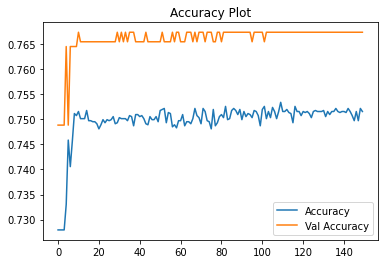

In [53]:
plt.plot(model.history.history['accuracy'], label='Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Plot')
plt.legend()
plt.show()

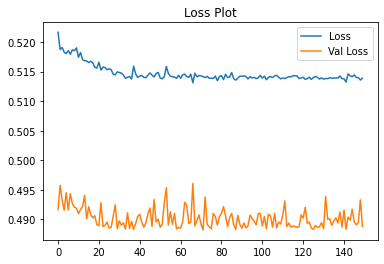

In [54]:
plt.plot(model.history.history['loss'], label='Loss')
plt.plot(model.history.history['val_loss'], label='Val Loss')
plt.title('Loss Plot')
plt.legend()
plt.show()

In [55]:
Y_pred = model.predict(X_test)
Y_pred = (Y_pred > 0.5)

66/66 [==============================] - 0s 1ms/step


In [57]:
print(confusion_matrix(Y_test, Y_pred))
print('Accuracy Score: ', accuracy_score(Y_test, Y_pred)*100)
print(classification_report(Y_test, Y_pred))

[[1473  107]
 [ 384  146]]
Accuracy Score:  76.7298578199052
              precision    recall  f1-score   support

           0       0.79      0.93      0.86      1580
           1       0.58      0.28      0.37       530

    accuracy                           0.77      2110
   macro avg       0.69      0.60      0.62      2110
weighted avg       0.74      0.77      0.74      2110



In [64]:
X=customer[['tenure']]
Y=customer[['Churn']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=rs)

In [65]:
model=Sequential()
model.add(Dense(12,input_dim=1,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 12)                24        
                                                                 
 dropout_4 (Dropout)         (None, 12)                0         
                                                                 
 dense_28 (Dense)            (None, 8)                 104       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.fit(X_train, Y_train, epochs=150, validation_data=(X_test,Y_test))

Epoch 1/150
154/154 [==============================] - 1s 5ms/step - loss: 2.0658 - accuracy: 0.6284 - val_loss: 0.7993 - val_accuracy: 0.7488
Epoch 2/150
154/154 [==============================] - 1s 4ms/step - loss: 1.0936 - accuracy: 0.6658 - val_loss: 0.5041 - val_accuracy: 0.7488
Epoch 3/150
154/154 [==============================] - 1s 4ms/step - loss: 0.7785 - accuracy: 0.6790 - val_loss: 0.5162 - val_accuracy: 0.7488
Epoch 4/150
154/154 [==============================] - 1s 3ms/step - loss: 0.7062 - accuracy: 0.6959 - val_loss: 0.5325 - val_accuracy: 0.7488
Epoch 5/150
154/154 [==============================] - 1s 4ms/step - loss: 0.6654 - accuracy: 0.7003 - val_loss: 0.5184 - val_accuracy: 0.7488
Epoch 6/150
154/154 [==============================] - 1s 4ms/step - loss: 0.6280 - accuracy: 0.7080 - val_loss: 0.5192 - val_accuracy: 0.7488
Epoch 7/150
154/154 [==============================] - 1s 4ms/step - loss: 0.6003 - accuracy: 0.7176 - val_loss: 0.5320 - val_accuracy: 0.7488

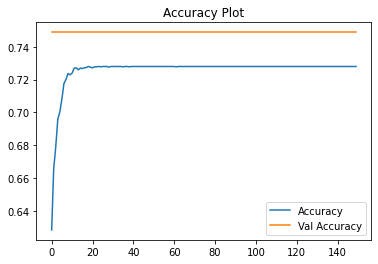

In [67]:
plt.plot(model.history.history['accuracy'], label='Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Plot')
plt.legend()
plt.show()

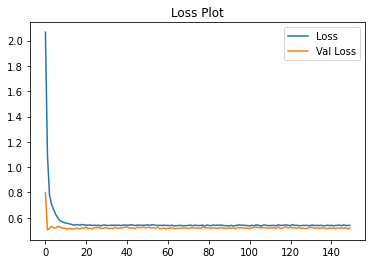

In [68]:
plt.plot(model.history.history['loss'], label='Loss')
plt.plot(model.history.history['val_loss'], label='Val Loss')
plt.title('Loss Plot')
plt.legend()
plt.show()

In [69]:
Y_pred = model.predict(X_test)
Y_pred = (Y_pred > 0.5)

66/66 [==============================] - 0s 1ms/step


In [70]:
print(confusion_matrix(Y_test, Y_pred))
print('Accuracy Score:', accuracy_score(Y_test, Y_pred)*100)
print(classification_report(Y_test, Y_pred))

[[1580    0]
 [ 530    0]]
Accuracy Score: 74.88151658767772
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1580
           1       0.00      0.00      0.00       530

    accuracy                           0.75      2110
   macro avg       0.37      0.50      0.43      2110
weighted avg       0.56      0.75      0.64      2110



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
X=customer[['tenure','MonthlyCharges','TotalCharges']]
Y=customer[['Churn']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=rs)

In [72]:
model=Sequential()
model.add(Dense(12,input_dim=3,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 12)                48        
                                                                 
 dense_31 (Dense)            (None, 8)                 104       
                                                                 
 dense_32 (Dense)            (None, 1)                 9         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.fit(X_train, Y_train, epochs=150, validation_data=(X_test,Y_test))

Epoch 1/150
154/154 [==============================] - 1s 4ms/step - loss: 20.5665 - accuracy: 0.5805 - val_loss: 0.5297 - val_accuracy: 0.7531
Epoch 2/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5545 - accuracy: 0.7401 - val_loss: 0.5084 - val_accuracy: 0.7649
Epoch 3/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5403 - accuracy: 0.7422 - val_loss: 0.4871 - val_accuracy: 0.7962
Epoch 4/150
154/154 [==============================] - 1s 3ms/step - loss: 0.5294 - accuracy: 0.7680 - val_loss: 0.5173 - val_accuracy: 0.7697
Epoch 5/150
154/154 [==============================] - 1s 3ms/step - loss: 0.5299 - accuracy: 0.7562 - val_loss: 0.4697 - val_accuracy: 0.7905
Epoch 6/150
154/154 [==============================] - 1s 3ms/step - loss: 0.5459 - accuracy: 0.7501 - val_loss: 0.6013 - val_accuracy: 0.7910
Epoch 7/150
154/154 [==============================] - 1s 3ms/step - loss: 0.5716 - accuracy: 0.7479 - val_loss: 0.4962 - val_accuracy: 0.788

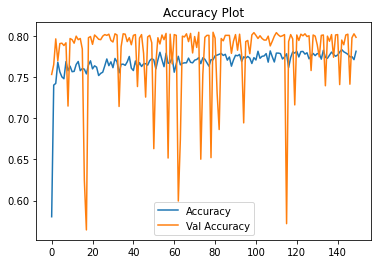

In [74]:
plt.plot(model.history.history['accuracy'], label='Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Plot')
plt.legend()
plt.show()

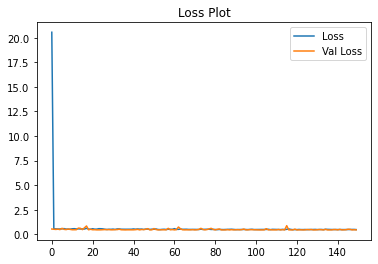

In [75]:
plt.plot(model.history.history['loss'], label='Loss')
plt.plot(model.history.history['val_loss'], label='Val Loss')
plt.title('Loss Plot')
plt.legend()
plt.show()

In [76]:
Y_pred = model.predict(X_test)
Y_pred = (Y_pred > 0.5)


66/66 [==============================] - 0s 1ms/step


In [77]:
print(confusion_matrix(Y_test, Y_pred))
print('Accuracy Score:', accuracy_score(Y_test, Y_pred)*100)
print(classification_report(Y_test, Y_pred))

[[1410  170]
 [ 256  274]]
Accuracy Score: 79.81042654028437
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1580
           1       0.62      0.52      0.56       530

    accuracy                           0.80      2110
   macro avg       0.73      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110

